In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Get the list of S&P 500 companies from wiki
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
html_data = requests.get(url)

In [3]:
# Parse the html data using bs4
bs = BeautifulSoup(html_data.text, "html.parser")

In [4]:
# Extract the table with stock data
table = bs.find_all('table', {'class':'wikitable'})
len(table)

2

In [5]:
#SP_500_companies = pd.DataFrame(columns=["Symbol","Security","Sector","Sub-Industry","Headquarters Location","Date first added","CIK","Founded"])

data = []
# Extract data from the table
for row in table[0].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Symbol = col[0].text.strip().replace('\n','')
        Security = col[1].text.strip().replace('\n','')
        Sector = col[2].text.strip().replace('\n','')
        Sub_Industry = col[3].text.strip().replace('\n','')
        Headquarters_Location = col[4].text.strip().replace('\n','')
        Date_first = col[5].text.strip().replace('\n','')
        CIK = col[6].text.strip().replace('\n','')
        Founded = col[7].text.strip().replace('\n','')
        data.append([Symbol, Security, Sector, Sub_Industry, Headquarters_Location, Date_first, CIK, Founded])
        
SP_500_Comp = pd.DataFrame(data, columns=["Symbol", "Security", "Sector", "Sub-Industry",
                                                "Headquarters Location", "Date first added", "CIK", "Founded"])

In [6]:
SP_500_Comp.head()

,Symbol,Security,Sector,Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,0000066740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,0000091142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,0000001800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,0001551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,0001467373,1989


In [7]:
# Count the number of stocks in each sector
count_SP_C = SP_500_Comp.groupby(['Sector'])['Sector'].count()
count_SP_C



Sector
Communication Services    22
Consumer Discretionary    53
Consumer Staples          38
Energy                    23
Financials                72
Health Care               64
Industrials               77
Information Technology    64
Materials                 29
Real Estate               31
Utilities                 30
Name: Sector, dtype: int64

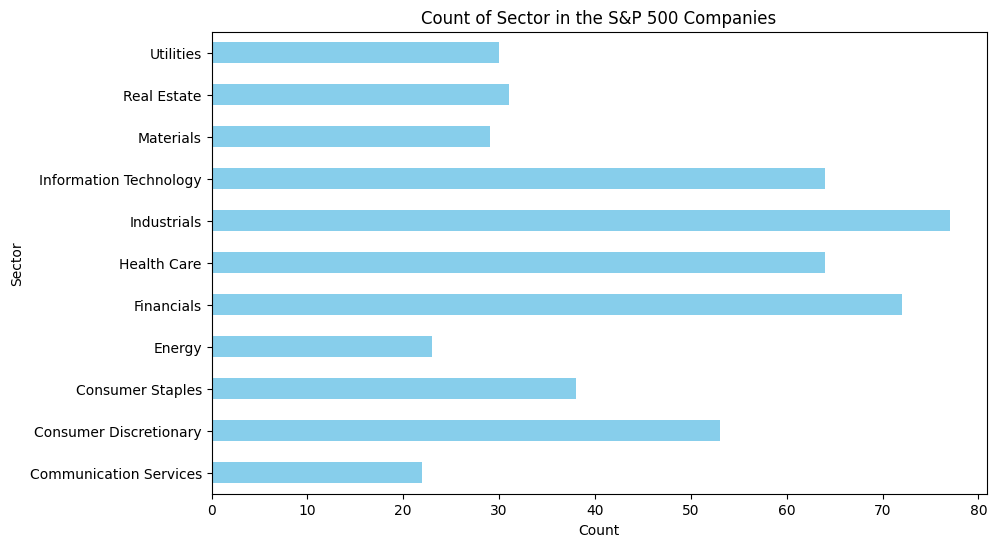

In [8]:
# Create a bar chart to visualize the count of Sector in the S&P 500 Companies
plt.figure(figsize=(10, 6))
count_SP_C.plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.ylabel('Sector')
plt.title('Count of Sector in the S&P 500 Companies')
plt.show()

In [9]:
# add S&P 500 Companies List by Sector & Market Cap table
url_cap = "https://www.liberatedstocktrader.com/sp-500-companies/"
cap_data = requests.get(url_cap)
bs_cap = BeautifulSoup(cap_data.text, "html.parser")
cap_table = bs_cap.find_all('table')


In [10]:
data_cap = []
# Extract data from the table
for row in cap_table[1].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Ticker = col[0].text.strip().replace('\n','')
        Description = col[1].text.strip().replace('\n','')
        Sector = col[2].text.strip().replace('\n','')
        Marketcap = col[3].text.strip().replace('\n','')
        data_cap.append([Ticker, Description, Sector, Marketcap])

data_cap_table = pd.DataFrame(data_cap, columns=["Symbol", "Description", "Sector", "Marketcap"])
        

In [11]:
data_cap_table = data_cap_table.drop(0)


In [12]:
data_cap_table

,Symbol,Description,Sector,Marketcap
1,AAPL,Apple Inc.,Electronic Technology,"2,728,017,215,293"
2,MSFT,Microsoft Corporation,Technology Services,"2,351,371,643,107"
3,GOOG,Alphabet Inc.,Technology Services,"1,611,856,497,958"
4,GOOGL,Alphabet Inc.,Technology Services,"1,610,343,852,181"
5,AMZN,"Amazon.com, Inc.",Retail Trade,"1,366,884,251,763"
...,...,...,...,...
499,LNC,Lincoln National Corporation,Finance,"4,368,181,590"
500,NWL,Newell Brands Inc.,Producer Manufacturing,"4,365,668,193"
501,DXC,DXC Technology Company,Technology Services,"4,154,780,819"
502,AAP,Advance Auto Parts Inc.,Retail Trade,"4,150,964,094"


In [13]:
merged_df = pd.merge(
    SP_500_Comp,
    data_cap_table,
    on = "Symbol",
    how='right'
)

In [14]:
merged_df

,Symbol,Security,Sector_x,Sub-Industry,Headquarters Location,Date first added,CIK,Founded,Description,Sector_y,Marketcap
0,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,0000320193,1977,Apple Inc.,Electronic Technology,"2,728,017,215,293"
1,MSFT,Microsoft,Information Technology,Systems Software,"Redmond, Washington",1994-06-01,0000789019,1975,Microsoft Corporation,Technology Services,"2,351,371,643,107"
2,GOOG,Alphabet Inc. (Class C),Communication Services,Interactive Media & Services,"Mountain View, California",2006-04-03,0001652044,1998,Alphabet Inc.,Technology Services,"1,611,856,497,958"
3,GOOGL,Alphabet Inc. (Class A),Communication Services,Interactive Media & Services,"Mountain View, California",2014-04-03,0001652044,1998,Alphabet Inc.,Technology Services,"1,610,343,852,181"
4,AMZN,Amazon,Consumer Discretionary,Broadline Retail,"Seattle, Washington",2005-11-18,0001018724,1994,"Amazon.com, Inc.",Retail Trade,"1,366,884,251,763"
...,...,...,...,...,...,...,...,...,...,...,...
498,LNC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lincoln National Corporation,Finance,"4,368,181,590"
499,NWL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Newell Brands Inc.,Producer Manufacturing,"4,365,668,193"
500,DXC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DXC Technology Company,Technology Services,"4,154,780,819"
501,AAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Advance Auto Parts Inc.,Retail Trade,"4,150,964,094"


In [15]:
# Define a function to convert strings to floats
def convert_market_cap(market_cap_str):
    # Remove commas and convert to float
    return float(market_cap_str.replace(',', '')) * 1e-3

In [16]:
# Apply the function to the 'MarketCap' column
merged_df['Marketcap'] = merged_df['Marketcap'].apply(convert_market_cap)

In [17]:
# Group by sector and sum the market capitalization
sector_marketcap = merged_df.groupby('Sector_x')['Marketcap'].sum()
sector_marketcap

Sector_x
Communication Services    5.151255e+09
Consumer Discretionary    4.171761e+09
Consumer Staples          2.807730e+09
Energy                    1.687430e+09
Financials                5.048092e+09
Health Care               5.122328e+09
Industrials               3.266532e+09
Information Technology    1.025406e+10
Materials                 9.239763e+08
Real Estate               9.526764e+08
Utilities                 9.323766e+08
Name: Marketcap, dtype: float64

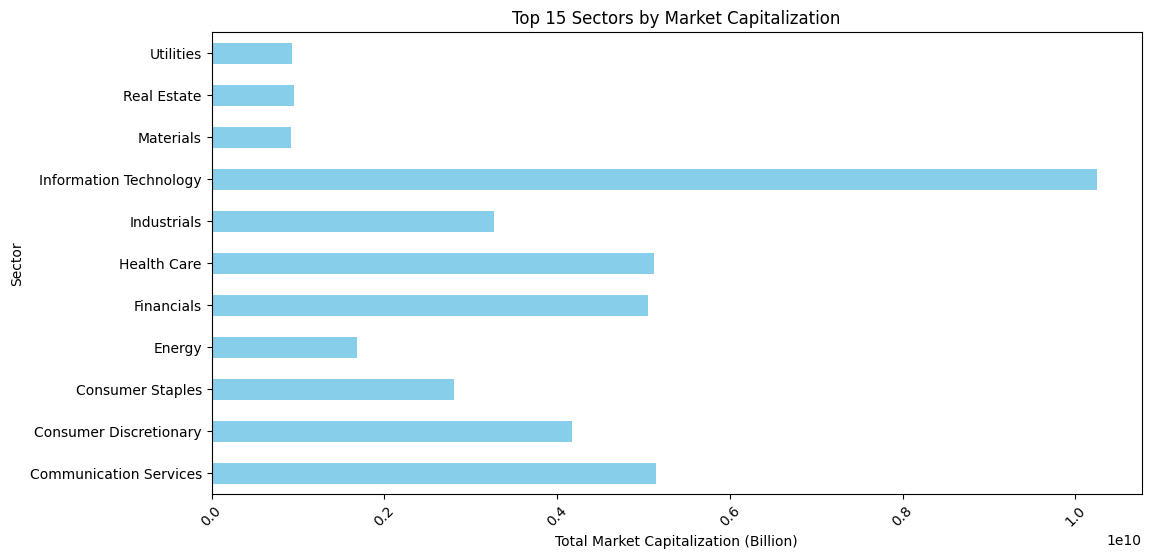

In [18]:
# Create a bar chart to visualize the top sectors by market capitalization
plt.figure(figsize=(12, 6))
sector_marketcap.plot(kind='barh', color='skyblue')
plt.xlabel('Total Market Capitalization (Billion)')
plt.ylabel('Sector')
plt.title('Top 15 Sectors by Market Capitalization')
plt.xticks(rotation=45)
plt.show()

Summary Report: Market Capitalization by Sector

This report provides an overview of the market capitalization for various sectors in the dataset. The market capitalization is presented in billion dollars.

Information Technology: This sector has the highest market capitalization at approximately 10.25 billion.

Communication Services: The Communication Services sector follows closely with a market capitalization of around 5.15 billion.

Health Care: The Health Care sector is also among the top sectors with a market capitalization of about 5.12 billion.

Financials: Financials are another significant sector with a market capitalization of approximately 5.05 billion.

Consumer Discretionary: This sector has a market capitalization of about 4.17 billion, making it one of the larger sectors.

Industrials: Industrials have a market capitalization of around 3.27 billion.

Consumer Staples: Consumer Staples follow with a market capitalization of approximately 2.81 billion.

Energy: The Energy sector has a market capitalization of about 1.69 billion.

Real Estate: Real Estate and Materials sectors have market capitalizations of approximately 0.95 billion and 0.92 billion, respectively.

Utilities: The Utilities sector rounds out the list with a market capitalization of about $0.93 billion.

This report illustrates the distribution of market capitalization among various sectors, highlighting the Information Technology sector as the largest by market capitalization. It provides valuable insights for investors and analysts seeking to understand the composition of the market.